# Cross Spectral Density Estimator Comparison


In [1]:
using PyPlot
using Random
using JLD

include("../../Examples/Nonlinear Langevin/DataGen.jl")
include("../AnalysisToolbox.jl")
include("../Model_Reduction_Dev.jl")

Unable to init server: Could not connect: Connection refused
Unable to init server: Could not connect: Connection refused

(.:3229862): Gdk-CRITICAL **: 15:43:08.929: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed

(.:3229862): Gdk-CRITICAL **: 15:43:08.932: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed


vector_wiener_filter_fft

## White Noise

In [2]:
steps = 10^7
W = randn(1,steps)

1×10000000 Array{Float64,2}:
 -0.603078  -0.618147  1.28807  1.02553  …  -1.73483  0.276513  -0.348873

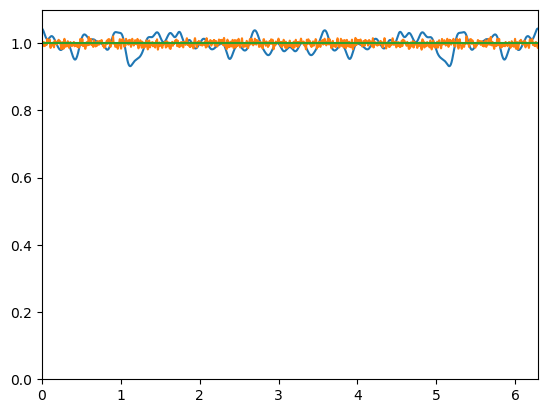

sum of μ: 1.0


C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


4-element Array{Float64,1}:
 0.0
 6.283185307179586
 0.0
 1.1

In [7]:
L    = 1000
Nex  = 10^6
win  = "Par"

nfft = 10^5
n    = 2
p    = 1000
ty   = "bin"


spect_D  = z_crossspect_fft_old(W,W;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(W, W;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:])
plot(F_D,spect_D[1,1,:])

spect_D_old = spect_D

plot([0, 2π],[1, 1])
axis([0, 2π, 0, 1.1]);

## MA Process

In [9]:
r = [-2 9 .1]

Wr = conv(r,W)[:,2:end]

1×10000001 Array{Float64,2}:
 -7.18869  -4.52963  -7.79688  9.83861  …  -9.81986  19.4692  0.217006

### Spectrum

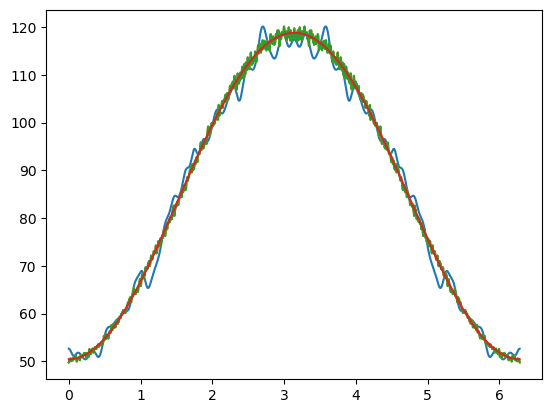

sum of μ: 1.0


C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003E284808>

In [13]:
spect_D  = z_crossspect_fft_old(Wr,Wr;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(Wr, Wr;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:])
plot(F_D,[spect_D[1,1,:] spect_D_old[1,1,:]])

spect_D_old = spect_D

R(θ) = r[1] + r[2]*exp(-im*θ) + r[3]*exp(-2im*θ)

plot(F_D,map(θ -> R(θ)conj(R(θ)),F_D))

### Cross spectrum

sig and pred are not the same length. Taking min.sig and pred are not the same length. Taking min.sizes must be the same, taking min and truncating


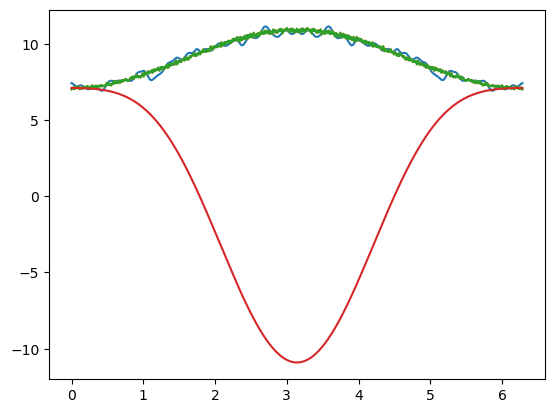

sum of μ: 1.0


C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000063F44FC8>

In [19]:
spect_D  = z_crossspect_fft_old(Wr,W;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(Wr, W;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:])
plot(F_D,[spect_D[1,1,:] spect_D_old[1,1,:]])

spect_D_old = spect_D

R(θ) = r[3] + r[2]*exp(-im*θ) + r[1]*exp(-2im*θ)

plot(F_D,map(θ -> R(θ),F_D))

## DWOL

In [2]:
# Model run Parameters
steps = 10^7 + 1
scheme = "FE"
t_start = 0
t_stop = 10^5
discard = 100000
sig_init = [1.5]
sigma = [.5]
V_prime = x -> -x.*(x.^2 .- 1)
SM1 = false
Obs_noise = false
d = 1
# e = randn(d,steps + discard)

dt = (t_stop - t_start)/(steps - 1)


# Get full model run
Random.seed!(2014)
X = DataGen_DWOL(
    steps;
    scheme, t_start, t_stop, discard, 
    sig_init , sigma, V_prime,
    SM1, Obs_noise, d
    )
### This is how we set up the signals and 
### predictors They have to me off set so 
### that pred is one index behind signal
### i.e. pre(n) = psi(sig(n-1))
X_sig = X[:,2:end];

Psi(x) = [x; x.^3]
X_pred = get_pred(X,Psi) # Notice it is just 
                         # X get_pred assigns
                         # psi straight across

2×10000001 Array{Float64,2}:
 1.21912  1.2862   1.30297  1.2873   …  1.17377  1.23803  1.20563  1.23796
 1.81191  2.12777  2.2121   2.13322     1.61716  1.89756  1.75244  1.89721

In [3]:
dt

0.01

In [3]:
auto_times(X_sig[:])

2-element Array{Float64,1}:
 1784.2591733108065
 1705.7725375673854

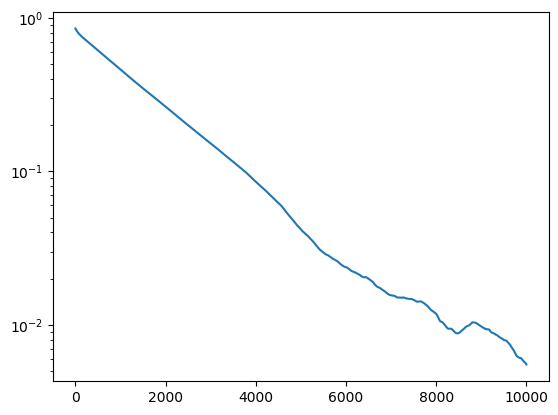

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003B140608>

In [6]:
A = my_autocov(X_sig[:],0:10000)
semilogy(A)

In [5]:
# Model reduction Parameters
L = 55
Nex = 2^16

S_dm = z_crossspect_fft_old(X_sig, X_pred; L, Nex);

n = 3
p = 500
ty = "bin"
nfft = 0

S_sp = z_crossspect_fft(X_sig, X_pred; nfft, n, p, ty);

sig and pred are not the same length. Taking min.sig and pred are not the same length. Taking min.sizes must be the same, taking min and truncating
sizes must be the same, taking min and truncating


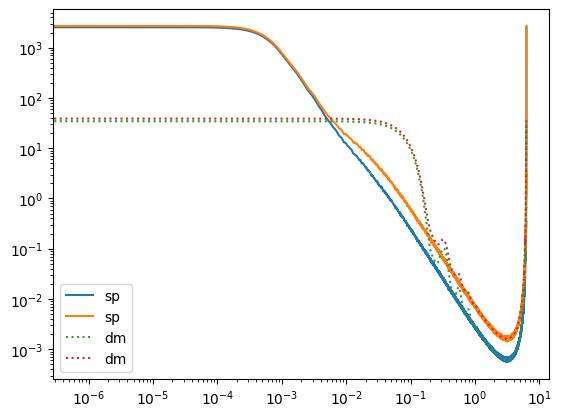

PyObject <matplotlib.legend.Legend object at 0x7f86ebc0b460>

In [6]:
N = size(S_sp,3)
loglog(2π*(0:N-1)/N,abs.(S_sp[1,:,:]'),label = "sp")
N = size(S_dm,3)
loglog(2π*(0:N-1)/N,abs.(S_dm[1,:,:]'),":",label = "dm")
legend()

In [7]:
# Model reduction Parameters
L = 10000
Nex = 2^16

S_dm = z_crossspect_fft_old(X_sig, X_pred; L, Nex);

n = 3
p = 500
ty = "bin"
nfft = 0

S_sp = z_crossspect_fft(X_sig, X_pred; nfft, n, p, ty);

sig and pred are not the same length. Taking min.sig and pred are not the same length. Taking min.sizes must be the same, taking min and truncating
sizes must be the same, taking min and truncating


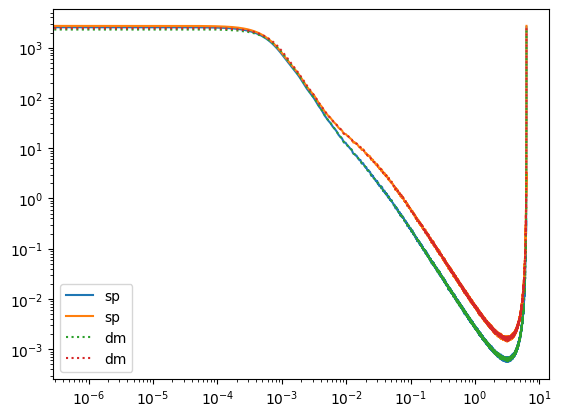

PyObject <matplotlib.legend.Legend object at 0x7f86f6ff4cd0>

In [8]:
N = size(S_sp,3)
loglog(2π*(0:N-1)/N,abs.(S_sp[1,:,:]'),label = "sp")
N = size(S_dm,3)
loglog(2π*(0:N-1)/N,abs.(S_dm[1,:,:]'),":",label = "dm")
legend()

In [11]:
# Model reduction Parameters
L = 5000
Nex = 2^16

S_dm = z_crossspect_fft_old(X_sig, X_pred; L, Nex);

n = 3
p = 500
ty = "bin"
nfft = 0

S_sp = z_crossspect_fft(X_sig, X_pred; nfft, n, p, ty);

sig and pred are not the same length. Taking min.sig and pred are not the same length. Taking min.sizes must be the same, taking min and truncating
sizes must be the same, taking min and truncating


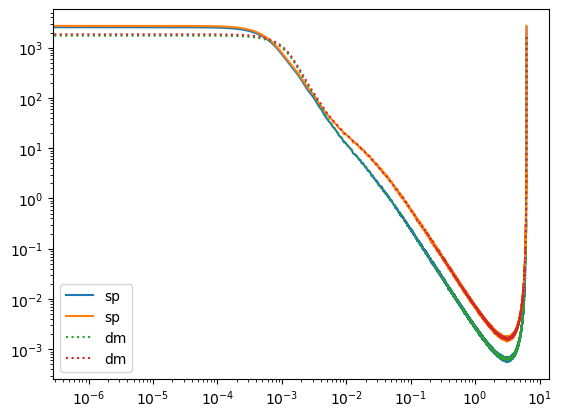

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x000000003A9C6388>

In [12]:
N = size(S_sp,3)
loglog(2π*(0:N-1)/N,abs.(S_sp[1,:,:]'),label = "sp")
N = size(S_dm,3)
loglog(2π*(0:N-1)/N,abs.(S_dm[1,:,:]'),":",label = "dm")
legend()

In [17]:
# Model reduction Parameters
L = 10000
Nex = 2^16

S_dm = z_crossspect_fft_old(X_sig, X_pred; L, Nex);

n = 3
p = 500
ty = "bin"
nfft = 0

S_sp = z_crossspect_fft(X_sig, X_pred; nfft, n, p, ty);

sig and pred are not the same length. Taking min.sig and pred are not the same length. Taking min.sizes must be the same, taking min and truncating
sizes must be the same, taking min and truncating


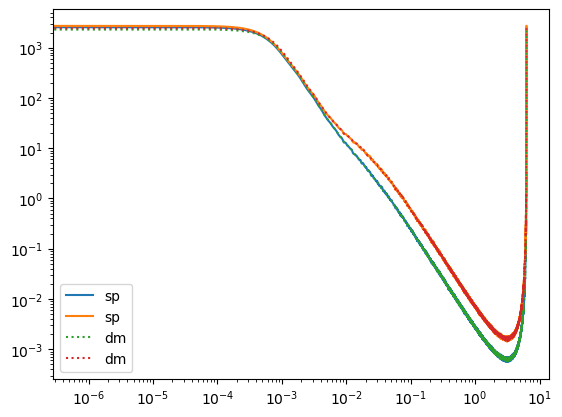

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x000000009628ABC8>

In [21]:
N = size(S_sp,3)
loglog(2π*(0:N-1)/N,abs.(S_sp[1,:,:]'),label = "sp")
N = size(S_dm,3)
loglog(2π*(0:N-1)/N,abs.(S_dm[1,:,:]'),":",label = "dm")
legend()

In [15]:
S_sp_above = S_sp;

In [16]:
# Model reduction Parameters
L = 55
Nex = 2^10

S_dm = z_crossspect_fft_old(X_sig, X_pred; L, Nex);

n = 3
p = 500
ty = "bin"
nfft = 10^6

S_sp = z_crossspect_fft(X_sig, X_pred; nfft, n, p, ty);

sig and pred are not the same length. Taking min.sig and pred are not the same length. Taking min.sizes must be the same, taking min and truncating
sizes must be the same, taking min and truncating


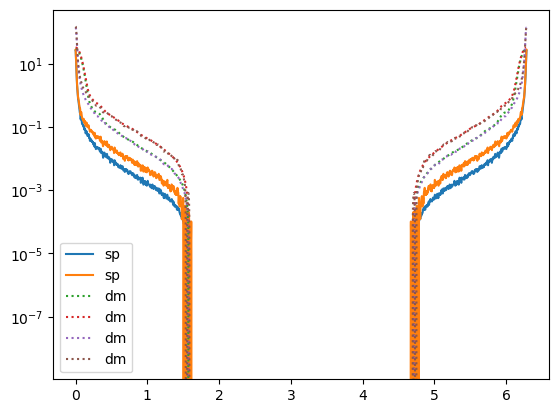

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x0000000002483CC8>

In [17]:
N = size(S_sp,3)
semilogy(2π*(0:N-1)/N,real(S_sp[1,:,:]'),label = "sp")
N = size(S_dm,3)
semilogy(2π*(0:N-1)/N,real(S_dm[1,:,:]'),":",label = "dm")

N = size(S_sp_above,3)
semilogy(2π*(0:N-1)/N,real(S_sp_above[1,:,:]'),":",label = "dm")
legend()

In [9]:
# Model reduction Parameters
L = 10000
Nex = 2^16

S_sp_16 = z_crossspect_fft(X_sig, X_pred; L, Nex);

# Model reduction Parameters
L = 10000
Nex = 2^15

S_sp_15 = z_crossspect_fft(X_sig, X_pred; L, Nex);

sig and pred are not the same length. Taking min.sig and pred are not the same length. Taking min.

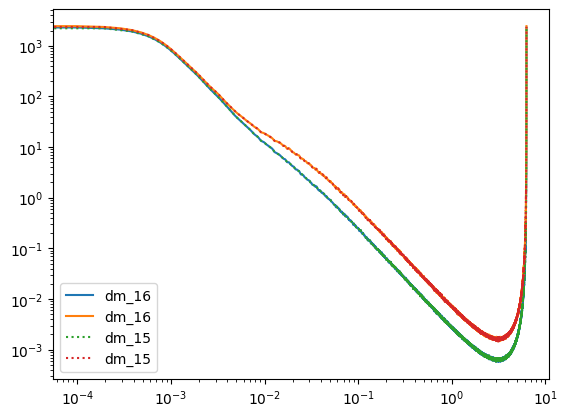

PyObject <matplotlib.legend.Legend object at 0x7f86eb739a60>

In [12]:
N = size(S_dm_16,3)
loglog(2π*(0:N-1)/N,abs.(S_dm_16[1,:,:]'),label = "dm_16")
N = size(S_dm_15,3)
loglog(2π*(0:N-1)/N,abs.(S_dm_15[1,:,:]'),":",label = "dm_15")
legend()